In [3]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [10]:
mnist_dataset = datasets.MNIST(root="./data", download=True, 
                               train=True, transform=transforms.ToTensor())

mnist_dataload = torch.utils.data.DataLoader(mnist_dataset, 
                                             batch_size=32, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [21]:
class Autoencoder(nn.Module):
    def __init__(self):
        
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, 5),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(5, 16),
            nn.ReLU(),
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )
        
    def forward(self, data):
        encode = self.encoder(data)
        decode = self.decoder(encode)
        return decode

In [22]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

In [23]:
epoch_number = 10
result = []

for epoch in range(epoch_number):
    for img, _ in mnist_dataload:
        img = img.reshape(-1, 28 * 28)
        reconstruct = model(img)
        loss = criterion(reconstruct, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch: {epoch + 1} loss: {loss.item()}")
    result.append((img, reconstruct))

Epoch: 1 loss: 0.031905438750982285
Epoch: 2 loss: 0.028351807966828346
Epoch: 3 loss: 0.021356426179409027
Epoch: 4 loss: 0.03274388983845711
Epoch: 5 loss: 0.024675894528627396
Epoch: 6 loss: 0.028179017826914787
Epoch: 7 loss: 0.027328791096806526
Epoch: 8 loss: 0.02484210953116417
Epoch: 9 loss: 0.0257293488830328
Epoch: 10 loss: 0.030383268371224403


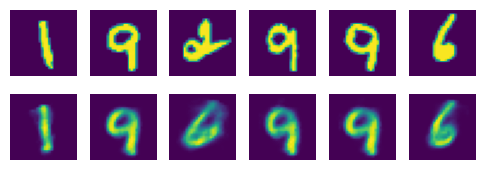

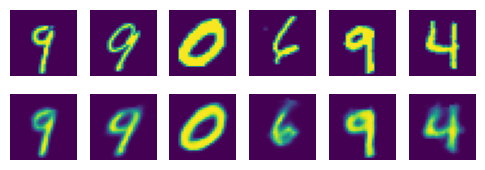

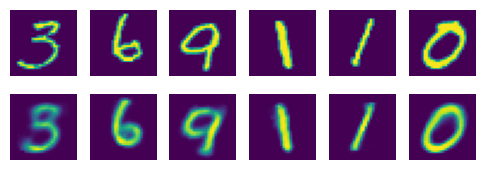

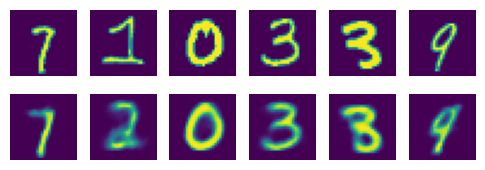

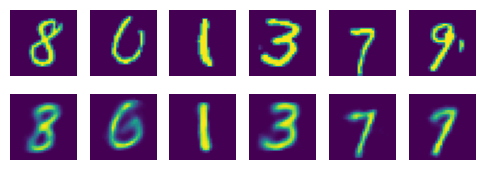

In [24]:
for k in range(0, epoch_number, 2):
    plt.figure(figsize=(6, 2))
    real_img = result[k][0].detach().numpy()
    recons = result[k][1].detach().numpy()
    for i, item in enumerate(real_img):
        if i>=6:
            break
        plt.subplot(2, 6, i+1)
        plt.axis("off")
        plt.imshow(item.reshape(28, 28))
    for i, item in enumerate(recons):
        if i>=6:
            break
        plt.subplot(2, 6, 6+i+1)
        plt.axis("off")
        plt.imshow(item.reshape(28, 28))
        
        